In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [2]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [3]:
def print_percentiles(c, name):
	print('-----------------------------\n')
	print('percentile values distribution for %s\n' % name)

	print('50th Percentile:%f\n' % c.Percentile(50))
	print('90th Percentile:%f\n' % c.Percentile(90))
	print('99th Percentile:%f\n' % c.Percentile(99))
	print('25th Percentile:%f\n' % c.Percentile(25))
	print('75th Percentile:%f\n' % c.Percentile(75))
	print('20th Percentile:%f\n' % c.Percentile(50))
	print('40th Percentile:%f\n' % c.Percentile(90))
	print('60th Percentile:%f\n' % c.Percentile(99))
	print('80th Percentile:%f\n' % c.Percentile(25))

	print('-----------------------------\n')

In [4]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
quic_data = "./AWS_results/London/data/output_quic.csv"

In [7]:
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']
as_names = ['Url', 'Ip', 'ASNo','ASName','Lat','Lon'] 

In [8]:
t = pd.read_csv(quic_data,';', names=tcol_names, header=None)

In [9]:
t = t.dropna()

In [10]:
asndata = "./data/pi-1/quic_perf/asinfo.csv"

In [11]:
asn = pd.read_csv(asndata, ',', names=as_names, header=None)
asn

,Url,Ip,ASNo,ASName,Lat,Lon
0,www.google.com,172.217.19.68,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,www.youtube.com,172.217.22.78,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,www.google.co.in,216.58.213.227,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
3,www.blogspot.com,172.217.18.9,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,www.google.co.jp,216.58.210.3,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
...,...,...,...,...,...,...
7428,www.holidaysequences.com,35.190.16.47,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
7429,www.nickzammeti.com,130.211.40.170,15169.0,GOOGLE - Google LLC,4.35,50.8500
7430,www.redlink-network.org,35.190.35.16,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
7431,www.reefh2o.com,35.190.16.47,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [12]:
#pd.set_option('display.max_rows', 500)
asn.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)


ASNo     ASName                                              
15169.0  GOOGLE - Google LLC                                     5040
15133.0  EDGECAST - MCI Communications Services                   557
7506.0   INTERQ GMO Internet                                      148
24940.0  HETZNER-AS - Hetzner Online GmbH                         126
16276.0  OVH - OVH SAS                                            102
                                                                 ... 
30148.0  SUCURI-SEC - Sucuri                                        1
48666.0  AS-MAROSNET - MAROSNET Telecommunication Company LLC       1
30860.0  YURTEH-AS - Virtual Systems LLC                            1
30933.0  PROTEXIA-EU - KDA WEB SERVICES LTD                         1
37907.0  DIGIROCK DigiRock                                          1
Length: 216, dtype: int64

In [13]:
asn.count()

Url       7433
Ip        7424
ASNo      7424
ASName    7424
Lat       7424
Lon       7424
dtype: int64

In [14]:
asn.head()

,Url,Ip,ASNo,ASName,Lat,Lon
0,www.google.com,172.217.19.68,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,www.youtube.com,172.217.22.78,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,www.google.co.in,216.58.213.227,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
3,www.blogspot.com,172.217.18.9,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,www.google.co.jp,216.58.210.3,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [15]:
t = t.join(asn.set_index('Url'), on='Url', rsuffix='_right')

In [16]:
t = t.drop('Ip_right', axis=1)

In [17]:
t.count()

TimeOfMeasurement              591451
Url                            591451
Path                           591451
Ip                             591451
Port                           591451
DNSTime                        591451
ConnectionEstablishmentTime    591451
TTFB                           591451
TotalDownloadTime              591451
HttpResponse                   591451
Protocol                       591451
ASNo                           461470
ASName                         461470
Lat                            461470
Lon                            461470
dtype: int64

In [18]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,12.391,60.646,294.884,453.066,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.908,74.243,355.084,448.920,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.944,21.414,860.889,988.966,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,18.836,19.287,308.384,420.452,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
9,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,22.519,25.195,249.730,398.125,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [19]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [20]:
#t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [21]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,12.391,60.646,294.884,453.066,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.908,74.243,355.084,448.920,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.944,21.414,860.889,988.966,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,18.836,19.287,308.384,420.452,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
9,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,22.519,25.195,249.730,398.125,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [22]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
1680994,1.589986e+09,www.sivergameoficial.blogspot.com,/,172.217.169.1,443,40.044,80.554,860.409,860.481,301.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1680996,1.589986e+09,www.ngeegame.blogspot.com,/,172.217.169.1,443,78.479,126.002,864.780,864.867,301.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1680997,1.589986e+09,www.ngeegame.blogspot.com,/,172.217.169.1,443,41.667,79.404,243.788,243.866,301.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1680999,1.589986e+09,www.kumutushka.blogspot.com,/,172.217.169.1,443,82.059,121.421,891.318,891.388,301.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1681000,1.589987e+09,www.arguscarhire.com,/,93.184.220.191,443,410.245,120.637,201.588,409.898,200.0,Q043,15133.0,EDGECAST - MCI Communications Services,8.0,47.0000


In [23]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [24]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [25]:
quic4 = quic4[quic4['HttpResponse'] == 200.0]
quic6 = quic6[quic6['HttpResponse'] == 200.0]

In [26]:
quic4.count()

TimeOfMeasurement              132001
Url                            132001
Path                           132001
Ip                             132001
Port                           132001
DNSTime                        132001
ConnectionEstablishmentTime    132001
TTFB                           132001
TotalDownloadTime              132001
HttpResponse                   132001
Protocol                       132001
ASNo                            85358
ASName                          85358
Lat                             85358
Lon                             85358
dtype: int64

In [27]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
24,1.589652e+09,www.100negocios.com,/,66.198.240.11,443,284.825,180.878,755.496,964.221,200.0,Q043,NaN,NaN,NaN,NaN
25,1.589652e+09,www.100negocios.com,/,66.198.240.11,443,0.803,178.837,791.951,12.283,200.0,Q046,NaN,NaN,NaN,NaN
26,1.589652e+09,www.100negocios.com,/,66.198.240.11,443,3.324,181.487,759.422,980.456,200.0,Q050,NaN,NaN,NaN,NaN
120,1.589652e+09,www.1-link.org,/,78.142.29.4,443,143.923,124.283,116.427,119.377,200.0,Q043,206349.0,BLUEANGELHOST - BlueAngelHost Pvt. Ltd,23.3333,42.7
121,1.589652e+09,www.1-link.org,/,78.142.29.4,443,0.742,139.123,335.342,338.804,200.0,Q046,206349.0,BLUEANGELHOST - BlueAngelHost Pvt. Ltd,23.3333,42.7


In [28]:
quic6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
ASNo                           0
ASName                         0
Lat                            0
Lon                            0
dtype: int64

In [29]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon


In [30]:
t.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo      ASName                                   
15169.0   GOOGLE - Google LLC                          362430
15133.0   EDGECAST - MCI Communications Services        44679
35415.0   WEBZILLA - Webzilla B.V.                       4191
55293.0   A2HOSTING - A2 Hosting                         4039
203226.0  IHCRU - Internet-Hosting Ltd                   3690
                                                        ...  
63408.0   SHOPIFYASN2 - Shopify                            46
55720.0   GIGABIT-MY Gigabit Hosting Sdn Bhd               46
43754.0   ASIATECH - Asiatech Data Transfer Inc PLC        41
20473.0   AS-CHOOPA - Choopa                               24
47748.0   DATICUM - Daticum JSC                            21
Length: 85, dtype: int64

In [31]:
t.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo      ASName                                   
15169.0   GOOGLE - Google LLC                          362430
15133.0   EDGECAST - MCI Communications Services        44679
35415.0   WEBZILLA - Webzilla B.V.                       4191
55293.0   A2HOSTING - A2 Hosting                         4039
203226.0  IHCRU - Internet-Hosting Ltd                   3690
                                                        ...  
63408.0   SHOPIFYASN2 - Shopify                            46
55720.0   GIGABIT-MY Gigabit Hosting Sdn Bhd               46
43754.0   ASIATECH - Asiatech Data Transfer Inc PLC        41
20473.0   AS-CHOOPA - Choopa                               24
47748.0   DATICUM - Daticum JSC                            21
Length: 85, dtype: int64

In [32]:
quic15169 = quic4.loc[t['ASNo'] == 15169]
quic15133 = quic4.loc[t['ASNo'] == 15133]
quic55293= quic4.loc[t['ASNo'] == 55293]
quic35415 = quic4.loc[t['ASNo'] == 35415]
quic203226 = quic4.loc[t['ASNo'] == 203226]

In [33]:
quic15169.count()

TimeOfMeasurement              34289
Url                            34289
Path                           34289
Ip                             34289
Port                           34289
DNSTime                        34289
ConnectionEstablishmentTime    34289
TTFB                           34289
TotalDownloadTime              34289
HttpResponse                   34289
Protocol                       34289
ASNo                           34289
ASName                         34289
Lat                            34289
Lon                            34289
dtype: int64

In [34]:
quic15133.count()

TimeOfMeasurement              26540
Url                            26540
Path                           26540
Ip                             26540
Port                           26540
DNSTime                        26540
ConnectionEstablishmentTime    26540
TTFB                           26540
TotalDownloadTime              26540
HttpResponse                   26540
Protocol                       26540
ASNo                           26540
ASName                         26540
Lat                            26540
Lon                            26540
dtype: int64

In [35]:
quic15133.count()

TimeOfMeasurement              26540
Url                            26540
Path                           26540
Ip                             26540
Port                           26540
DNSTime                        26540
ConnectionEstablishmentTime    26540
TTFB                           26540
TotalDownloadTime              26540
HttpResponse                   26540
Protocol                       26540
ASNo                           26540
ASName                         26540
Lat                            26540
Lon                            26540
dtype: int64

In [36]:
quic55293.count()

TimeOfMeasurement              2293
Url                            2293
Path                           2293
Ip                             2293
Port                           2293
DNSTime                        2293
ConnectionEstablishmentTime    2293
TTFB                           2293
TotalDownloadTime              2293
HttpResponse                   2293
Protocol                       2293
ASNo                           2293
ASName                         2293
Lat                            2293
Lon                            2293
dtype: int64

In [37]:
quic35415.count()

TimeOfMeasurement              834
Url                            834
Path                           834
Ip                             834
Port                           834
DNSTime                        834
ConnectionEstablishmentTime    834
TTFB                           834
TotalDownloadTime              834
HttpResponse                   834
Protocol                       834
ASNo                           834
ASName                         834
Lat                            834
Lon                            834
dtype: int64

In [38]:
quic15169_6 = quic6.loc[t['ASNo'] == 15169]
quic15133_6 = quic6.loc[t['ASNo'] == 15133]
quic55293_6 = quic6.loc[t['ASNo'] == 55293]
quic35415_6 = quic6.loc[t['ASNo'] == 35415]
quic203226_6 = quic6.loc[t['ASNo'] == 203226]

In [39]:
quic15169_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
ASNo                           0
ASName                         0
Lat                            0
Lon                            0
dtype: int64

In [40]:
quic15133.count()

TimeOfMeasurement              26540
Url                            26540
Path                           26540
Ip                             26540
Port                           26540
DNSTime                        26540
ConnectionEstablishmentTime    26540
TTFB                           26540
TotalDownloadTime              26540
HttpResponse                   26540
Protocol                       26540
ASNo                           26540
ASName                         26540
Lat                            26540
Lon                            26540
dtype: int64

In [41]:
x = Cdf.MakeCdfFromList(quic15169['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic35415['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226['ConnectionEstablishmentTime'].values)

In [42]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:43.501000

90th Percentile:269.016000

99th Percentile:903.117000

25th Percentile:40.429000

75th Percentile:80.390000

20th Percentile:43.501000

40th Percentile:269.016000

60th Percentile:903.117000

80th Percentile:40.429000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:244.467000

90th Percentile:324.208000

99th Percentile:677.527000

25th Percentile:240.754000

75th Percentile:247.199000

20th Percentile:244.467000

40th Percentile:324.208000

60th Percentile:677.527000

80th Percentile:240.754000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:80.707000

90th Percentile:85.168000

99th Percentile:611.199000

25th Percentile:78.542000

75th Percentile:81.918000

20th Percentile:80.707000

40th Percentile:85.168000

60th Percentile:61

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


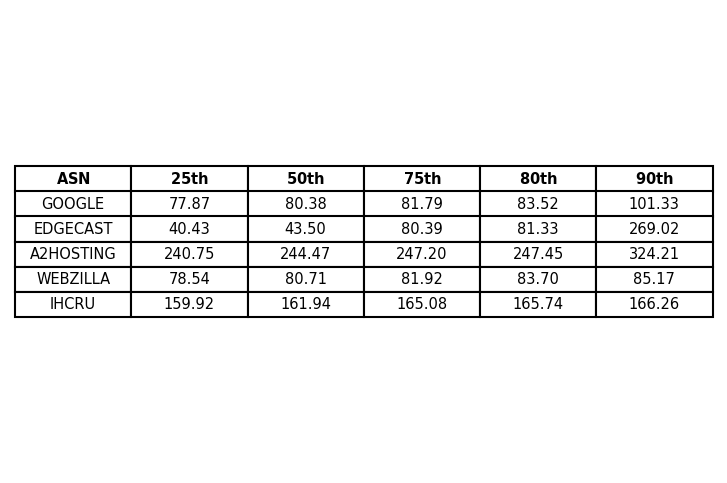

In [43]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/London/ASN/handshake_times_IPv4_asno_percentile.png', format='png', bbox_inches='tight')


In [44]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


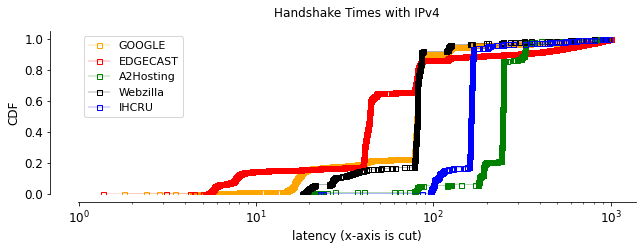

In [45]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
##ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/London/ASN/handshake_times_IPv4_asno.png', format='png', bbox_inches='tight')


In [46]:
x = Cdf.MakeCdfFromList(quic15169['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic15133['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic55293['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic35415['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic203226['TTFB'].values)

In [47]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:150.956000

90th Percentile:684.998000

99th Percentile:954.003000

25th Percentile:80.927000

75th Percentile:373.714000

20th Percentile:150.956000

40th Percentile:684.998000

60th Percentile:954.003000

80th Percentile:80.927000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:368.589000

90th Percentile:695.944000

99th Percentile:940.109000

25th Percentile:364.716000

75th Percentile:454.664000

20th Percentile:368.589000

40th Percentile:695.944000

60th Percentile:940.109000

80th Percentile:364.716000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:121.685000

90th Percentile:200.891000

99th Percentile:696.325000

25th Percentile:119.313000

75th Percentile:160.003000

20th Percentile:121.685000

40th Percentile:200.891000

60th Perc

In [48]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


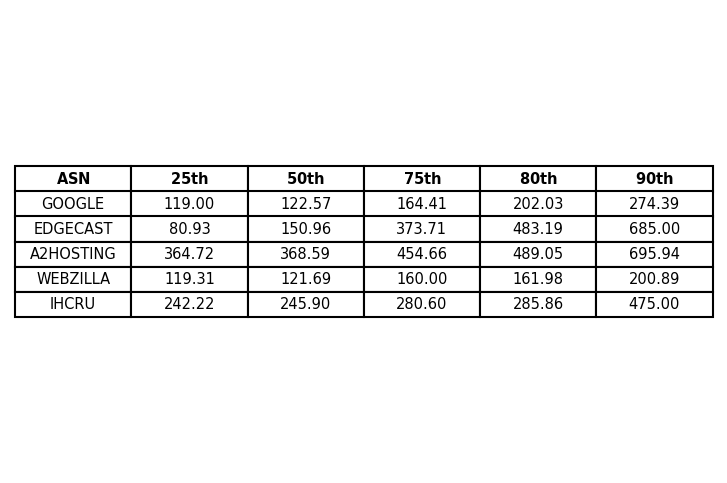

In [49]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/London/ASN/TTFB_ipv4_asno_percentile.png', format='png', bbox_inches='tight')

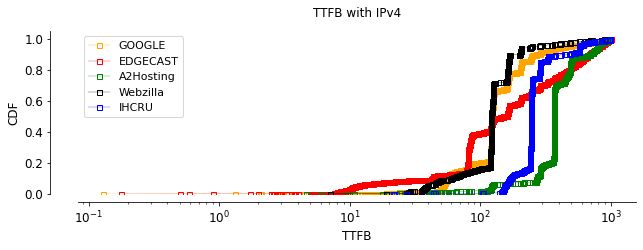

In [50]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/London/ASN/TTFB_ipv4_asno.png', format='png', bbox_inches='tight')

In [51]:
x = Cdf.MakeCdfFromList(quic15169['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic35415['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226['TotalDownloadTime'].values)

In [52]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:276.106000

90th Percentile:776.681000

99th Percentile:979.964000

25th Percentile:123.583000

75th Percentile:513.702000

20th Percentile:276.106000

40th Percentile:776.681000

60th Percentile:979.964000

80th Percentile:123.583000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:409.533000

90th Percentile:724.854000

99th Percentile:921.790000

25th Percentile:367.295000

75th Percentile:532.398000

20th Percentile:409.533000

40th Percentile:724.854000

60th Percentile:921.790000

80th Percentile:367.295000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:126.252000

90th Percentile:206.836000

99th Percentile:696.583000

25th Percentile:120.645000

75th Percentile:165.360000

20th Percentile:126.252000

40th Percentile:206.836000

60th Pe

In [53]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


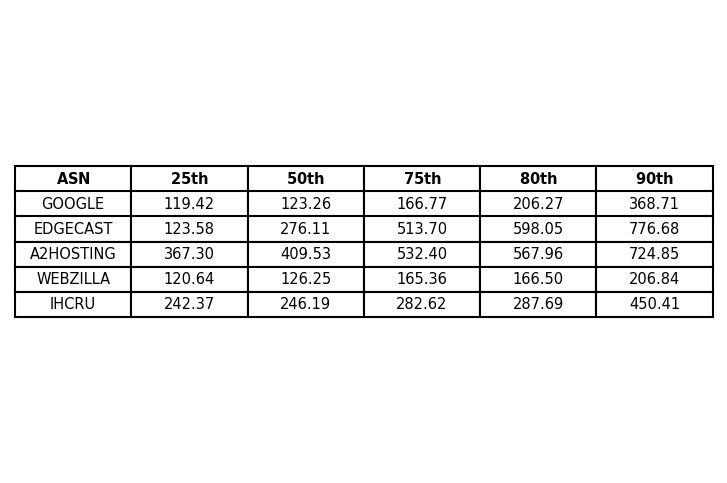

In [54]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/London/ASN/TotalDownloadTime_ipv4_asno_percentile.png', format='png', bbox_inches='tight')

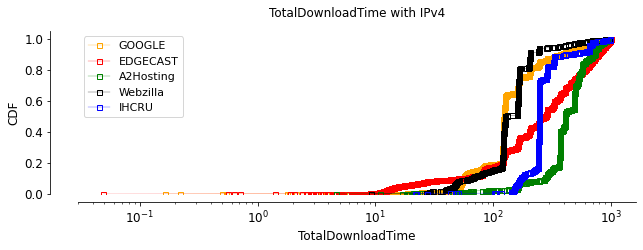

In [55]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/London/ASN/TotalDownloadTime_ipv4_asno.png', format='png', bbox_inches='tight')

In [56]:
#GOOGLE
quic46 = quic15169.loc[t['Protocol'] == 'Q046']
quic43 = quic15169.loc[t['Protocol'] == 'Q043']
quic50 = quic15169.loc[t['Protocol'] == 'Q050']
quich24 = quic15169.loc[t['Protocol'] == 'FF000018']

In [57]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

In [58]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:80.015000

90th Percentile:118.407000

99th Percentile:803.320000

25th Percentile:77.840000

75th Percentile:81.769000

20th Percentile:80.015000

40th Percentile:118.407000

60th Percentile:803.320000

80th Percentile:77.840000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:80.080000

90th Percentile:119.589000

99th Percentile:806.957000

25th Percentile:77.817000

75th Percentile:81.981000

20th Percentile:80.080000

40th Percentile:119.589000

60th Percentile:806.957000

80th Percentile:77.817000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:80.731000

90th Percentile:85.391000

99th Percentile:780.974000

25th Percentile:78.024000

75th Percentile:81.611000

20th Percentile:80.731000

40th Percentile:85.391000

60th Percentile:780.974000

80th Perce

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


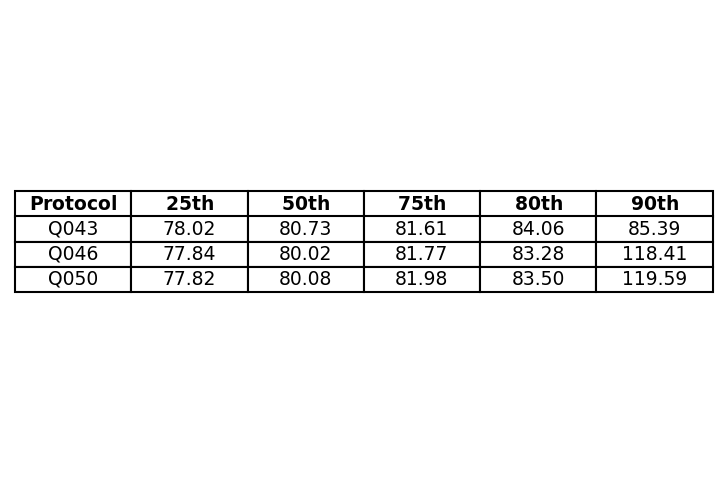

In [59]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/CapeTown/ASN/handshake_times_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

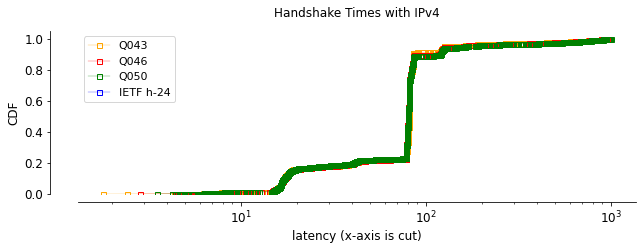

In [60]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Qh24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h-24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/CapeTown/ASN/handshake_times_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [61]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [62]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:122.178000

90th Percentile:275.119000

99th Percentile:879.154000

25th Percentile:118.696000

75th Percentile:163.444000

20th Percentile:122.178000

40th Percentile:275.119000

60th Percentile:879.154000

80th Percentile:118.696000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:122.129000

90th Percentile:273.664000

99th Percentile:874.677000

25th Percentile:118.642000

75th Percentile:162.997000

20th Percentile:122.129000

40th Percentile:273.664000

60th Percentile:874.677000

80th Percentile:118.642000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:123.579000

90th Percentile:274.388000

99th Percentile:864.389000

25th Percentile:120.102000

75th Percentile:166.200000

20th Percentile:123.579000

40th Percentile:274.388000

60th Percentile:864.38

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


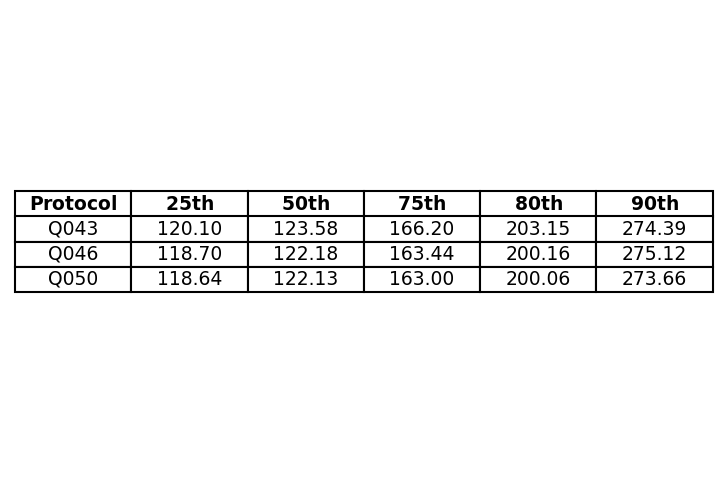

In [63]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/CapeTown/ASN/handshake_times_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

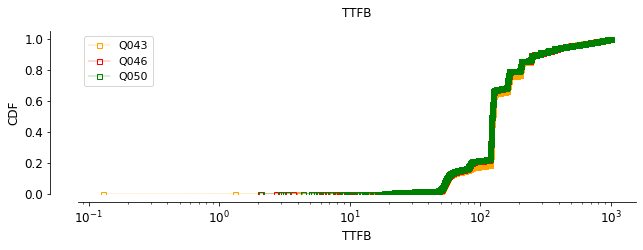

In [64]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./AWS/CapeTown/ASN/TTFB_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [65]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [66]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:122.888000

90th Percentile:368.654000

99th Percentile:898.423000

25th Percentile:119.078000

75th Percentile:165.890000

20th Percentile:122.888000

40th Percentile:368.654000

60th Percentile:898.423000

80th Percentile:119.078000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:122.877000

90th Percentile:369.046000

99th Percentile:900.407000

25th Percentile:119.162000

75th Percentile:166.071000

20th Percentile:122.877000

40th Percentile:369.046000

60th Percentile:900.407000

80th Percentile:119.162000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:124.225000

90th Percentile:368.752000

99th Percentile:900.801000

25th Percentile:120.504000

75th Percentile:202.311000

20th Percentile:124.225000

40th Percentile:368.752000

60th Percentile:900.80

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


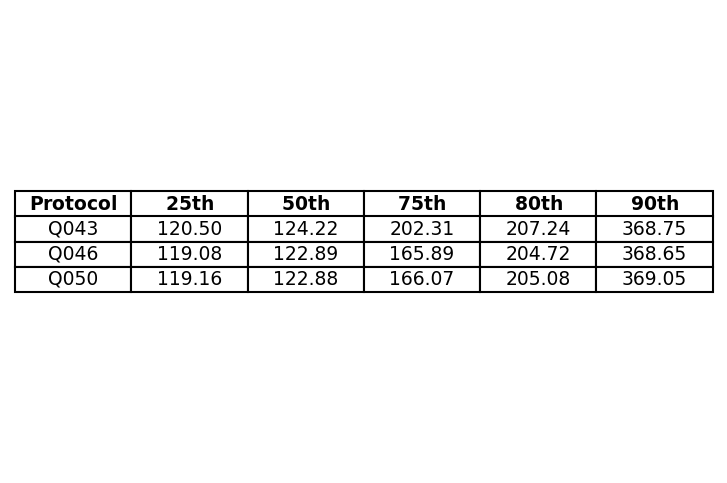

In [67]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/CapeTown/ASN/total_download_time_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

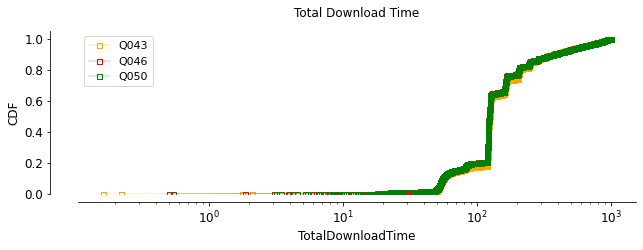

In [68]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Total Download Time', fontsize=12, y=1.05)
plt.savefig('./AWS/CapeTown/ASN/total_download_time_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [69]:
#Edgecast
quic44 = quic15133.loc[t['Protocol'] == 'Q046']
quic43 = quic15133.loc[t['Protocol'] == 'Q043']
quic39 = quic15133.loc[t['Protocol'] == 'Q050']
quic35 = quic15133.loc[t['Protocol'] == 'FF000018']

In [70]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

In [71]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:80.015000

90th Percentile:118.407000

99th Percentile:803.320000

25th Percentile:77.840000

75th Percentile:81.769000

20th Percentile:80.015000

40th Percentile:118.407000

60th Percentile:803.320000

80th Percentile:77.840000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:80.080000

90th Percentile:119.589000

99th Percentile:806.957000

25th Percentile:77.817000

75th Percentile:81.981000

20th Percentile:80.080000

40th Percentile:119.589000

60th Percentile:806.957000

80th Percentile:77.817000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:43.427000

90th Percentile:122.252000

99th Percentile:887.333000

25th Percentile:40.322000

75th Percentile:47.821000

20th Percentile:43.427000

40th Percentile:122.252000

60th Percentile:887.333000

80th Per

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


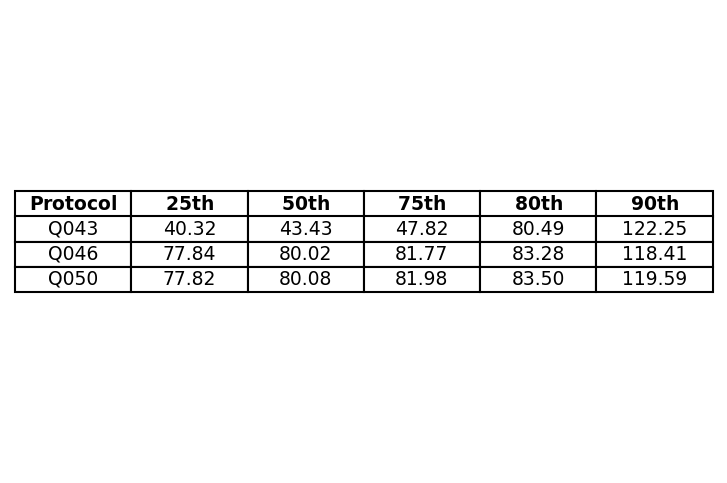

In [72]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/CapeTown/ASN/handshake_times_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')

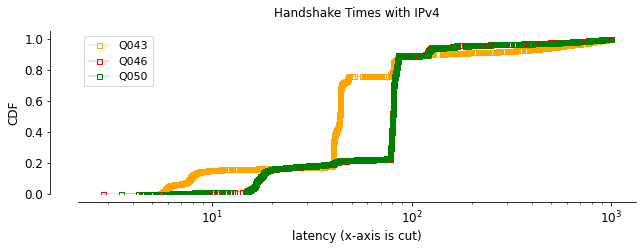

In [73]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/CapeTown/ASN/handshake_times_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [74]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [75]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:122.178000

90th Percentile:275.119000

99th Percentile:879.154000

25th Percentile:118.696000

75th Percentile:163.444000

20th Percentile:122.178000

40th Percentile:275.119000

60th Percentile:879.154000

80th Percentile:118.696000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:122.129000

90th Percentile:273.664000

99th Percentile:874.677000

25th Percentile:118.642000

75th Percentile:162.997000

20th Percentile:122.129000

40th Percentile:273.664000

60th Percentile:874.677000

80th Percentile:118.642000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:165.508000

90th Percentile:706.210000

99th Percentile:964.562000

25th Percentile:81.900000

75th Percentile:435.780000

20th Percentile:165.508000

40th Percentile:706.210000

60th Percentile:964.562

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


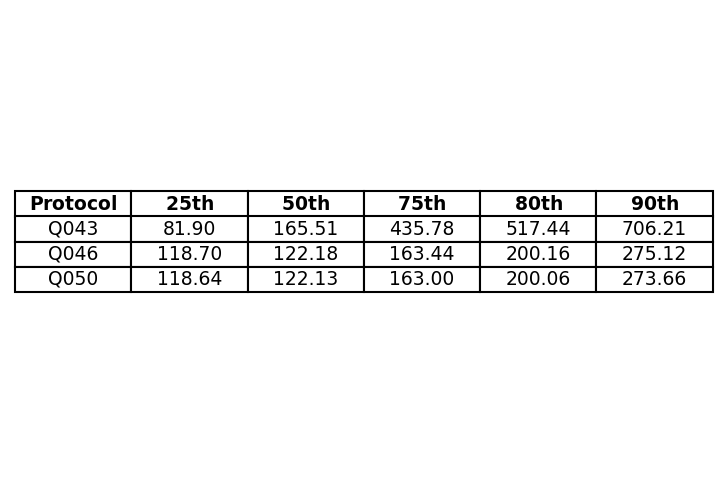

In [76]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/CapeTown/ASN/TTFB_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')


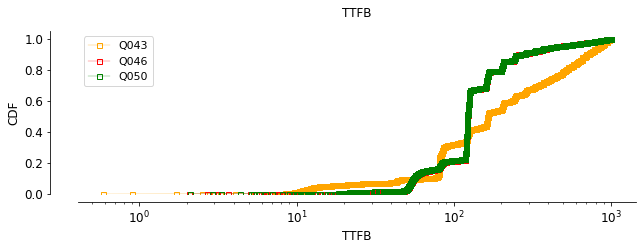

In [77]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h4
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./AWS/CapeTown/ASN/TTFB_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [78]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [79]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:122.888000

90th Percentile:368.654000

99th Percentile:898.423000

25th Percentile:119.078000

75th Percentile:165.890000

20th Percentile:122.888000

40th Percentile:368.654000

60th Percentile:898.423000

80th Percentile:119.078000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:122.877000

90th Percentile:369.046000

99th Percentile:900.407000

25th Percentile:119.162000

75th Percentile:166.071000

20th Percentile:122.877000

40th Percentile:369.046000

60th Percentile:900.407000

80th Percentile:119.162000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:287.686000

90th Percentile:795.216000

99th Percentile:980.867000

25th Percentile:125.896000

75th Percentile:552.708000

20th Percentile:287.686000

40th Percentile:795.216000

60th Percentile:980.86

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


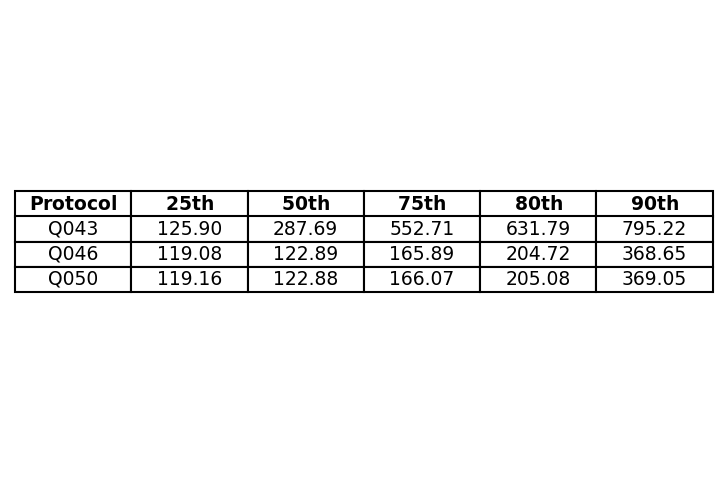

In [80]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/CapeTown/ASN/Total_Download_time_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')

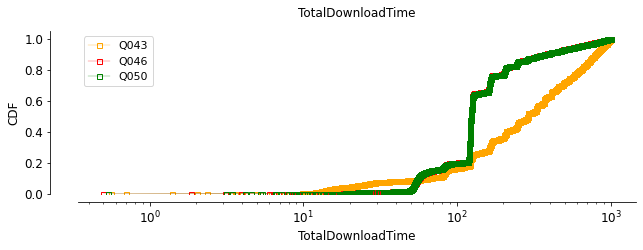

In [81]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./AWS/CapeTown/ASN/Total_Download_time_ipv4_asn15133.png', format='png', bbox_inches='tight')



In [82]:
# IHCRU - Internet-Hosting Ltd
quic203226 = quic4.loc[t['ASNo'] == 203226]
quic46 = quic203226.loc[t['Protocol'] == 'Q046']
quic43 = quic203226.loc[t['Protocol'] == 'Q043']
quic50 = quic203226.loc[t['Protocol'] == 'Q050']
quich24 = quic203226.loc[t['Protocol'] == 'FF000018']

In [83]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


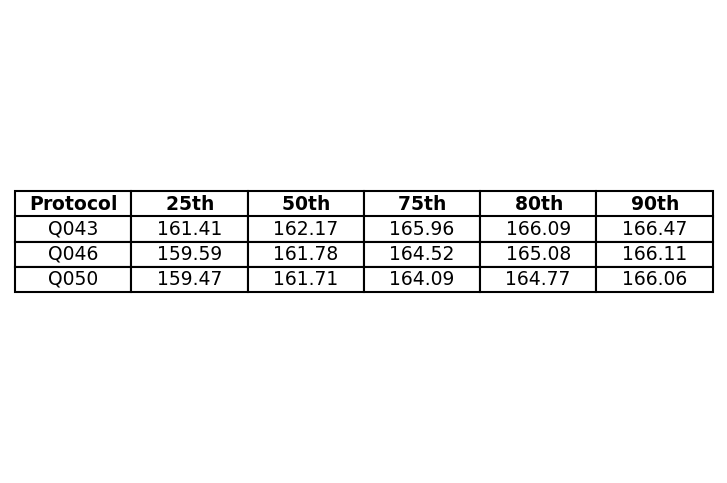

In [84]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/CapeTown/ASN/handshake_times_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')

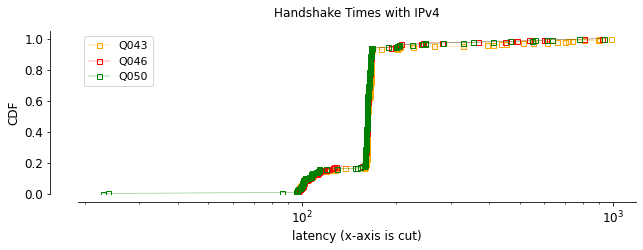

In [85]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/CapeTown/ASN/handshake_times_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [86]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [87]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:245.194000

90th Percentile:328.445000

99th Percentile:681.938000

25th Percentile:242.025000

75th Percentile:268.142000

20th Percentile:245.194000

40th Percentile:328.445000

60th Percentile:681.938000

80th Percentile:242.025000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:245.556000

90th Percentile:368.092000

99th Percentile:694.484000

25th Percentile:241.200000

75th Percentile:280.028000

20th Percentile:245.556000

40th Percentile:368.092000

60th Percentile:694.484000

80th Percentile:241.200000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:246.945000

90th Percentile:571.564000

99th Percentile:985.238000

25th Percentile:242.832000

75th Percentile:283.250000

20th Percentile:246.945000

40th Percentile:571.564000

60th Percentile:985.23

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


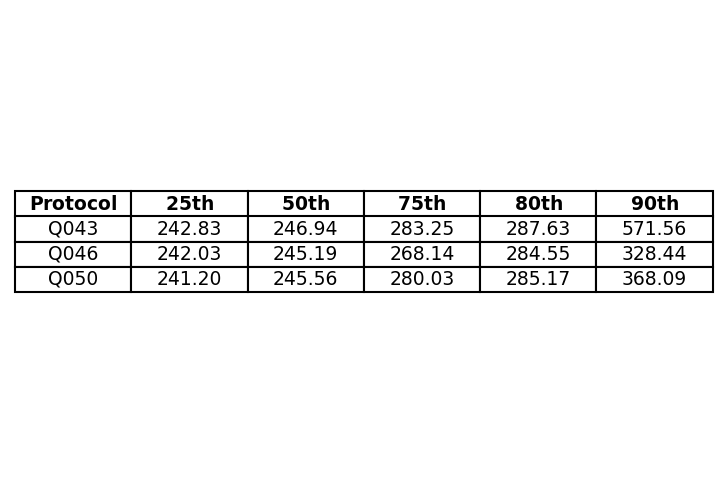

In [88]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/CapeTown/ASN/ttfb_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')

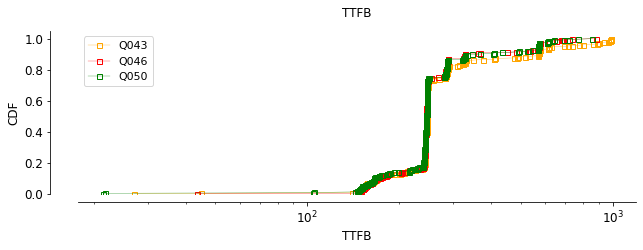

In [89]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q=h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./AWS/CapeTown/ASN/ttfb_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [90]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [91]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:245.526000

90th Percentile:329.499000

99th Percentile:702.135000

25th Percentile:242.303000

75th Percentile:282.171000

20th Percentile:245.526000

40th Percentile:329.499000

60th Percentile:702.135000

80th Percentile:242.303000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:245.702000

90th Percentile:368.328000

99th Percentile:768.456000

25th Percentile:241.387000

75th Percentile:281.582000

20th Percentile:245.702000

40th Percentile:368.328000

60th Percentile:768.456000

80th Percentile:241.387000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:247.131000

90th Percentile:629.935000

99th Percentile:985.309000

25th Percentile:242.906000

75th Percentile:284.238000

20th Percentile:247.131000

40th Percentile:629.935000

60th Percentile:985.30

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


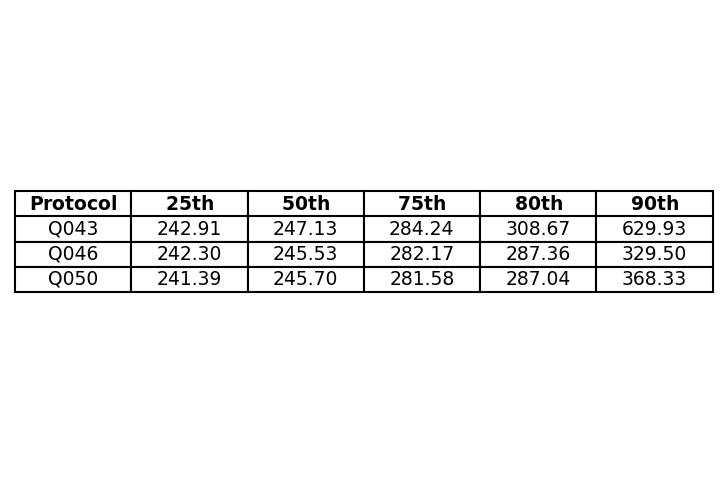

In [92]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/CapeTown/ASN/totaldownloadtime_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')


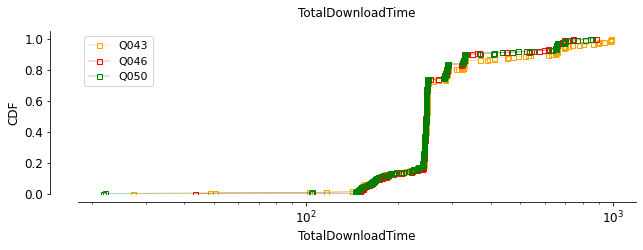

In [93]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./AWS/CapeTown/ASN/totaldownloadtime_ipv4_asn203226.png', format='png', bbox_inches='tight')
